# Wild Blueberry Yield Prediction 

## Data Description 

The dataset is for the competition on Kaggle. The dataset is about the Wild Blueberries and the parameters that are helpful to grow the blueberries. The features table is given below.



| Features              | Unit          | Description                                                        |
| --------------------- | ------------- | ------------------------------------------------------------------ |
| Clonesize             | m2            | The average blueberry clone size in the field                      |
| Honeybee              | bees/m2/min   | Honeybee density in the field                                      |
| Bumbles               | bees/m2/min   | Bumblebee density in the field                                     |
| Andrena               | bees/m2/min   | Andrena bee density in the field                                   |
| Osmia                 | bees/m2/min   | Osmia bee density in the field                                     |
| MaxOfUpperTRange      | ℃             | The highest record of the upper band daily air temperature during the bloom season |
| MinOfUpperTRange      | ℃             | The lowest record of the upper band daily air temperature          |
| AverageOfUpperTRange  | ℃             | The average of the upper band daily air temperature                |
| MaxOfLowerTRange      | ℃             | The highest record of the lower band daily air temperature         |
| MinOfLowerTRange      | ℃             | The lowest record of the lower band daily air temperature          |
| AverageOfLowerTRange  | ℃             | The average of the lower band daily air temperature                |
| RainingDays           | Day           | The total number of days during the bloom season, each of which has precipitation larger than zero |
| AverageRainingDays    | Day           | The average of raining days of the entire bloom season             |


Data source of this data set is: https://www.kaggle.com/competitions/playground-series-s3e14/data 
The dataset is already divided into train and test set. 

## Problem Statement

This project understands how accurately we can predict the yield of the wild blueberries with the given features like type and availability of honey bees, tempreature range and rainy days.

## Data & Package Importing

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [43]:
train_set = pd.read_csv("D:\\End-to-End ML Projects\\MLProject\\Dataset\\train.csv")
test_set = pd.read_csv("D:\\End-to-End ML Projects\\MLProject\\Dataset\\test.csv")
original_set = pd.read_csv("D:\\End-to-End ML Projects\\MLProject\\Dataset\\original.csv")

## Data Cleaning and Preparation 

In [3]:
train_set.shape

(15289, 18)

In [4]:
test_set.shape

(10194, 17)

In [5]:
original_set.shape

(777, 18)

The train & test data is divided almost equally. In which training set have 15289 rows and 18 columns. The test set have 10194 rows and 17 columns. The test set doesn't contain target variable. 

In [6]:
# Firstly understanding the data distribution

train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15289.0,7644.000000,4413.698468,0.000000,3822.000000,7644.000000,11466.000000,15288.000000
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000


From the above data statistics, it can be observed that there is not much difference in min and max of the features except the `RainingDays` & `yield` that says that probably they are not normally distributed.

In [7]:
test_set.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,20385.500000,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,2942.898656,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,15289.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,17837.250000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,20385.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,22933.750000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,25482.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


By observing the standard deviation, mean, min and max the data destribution of train and test data is almost same

In [8]:
train_set.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There is no missing values in the dataset

In [9]:
test_set.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

There are no missing values in the test dataset as well. 

In [10]:
# checking missing values
train_set.duplicated().sum()

0

There are no duplicate values present in the dataset

In [11]:
# Checking data type

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [13]:
# Checking the unique values in the dataset

train_set.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

In [14]:
# Exploring the data

train_set.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


Here all the variables are numerical

## Exploratory Data Analysis

### Train test overlapping and distribution

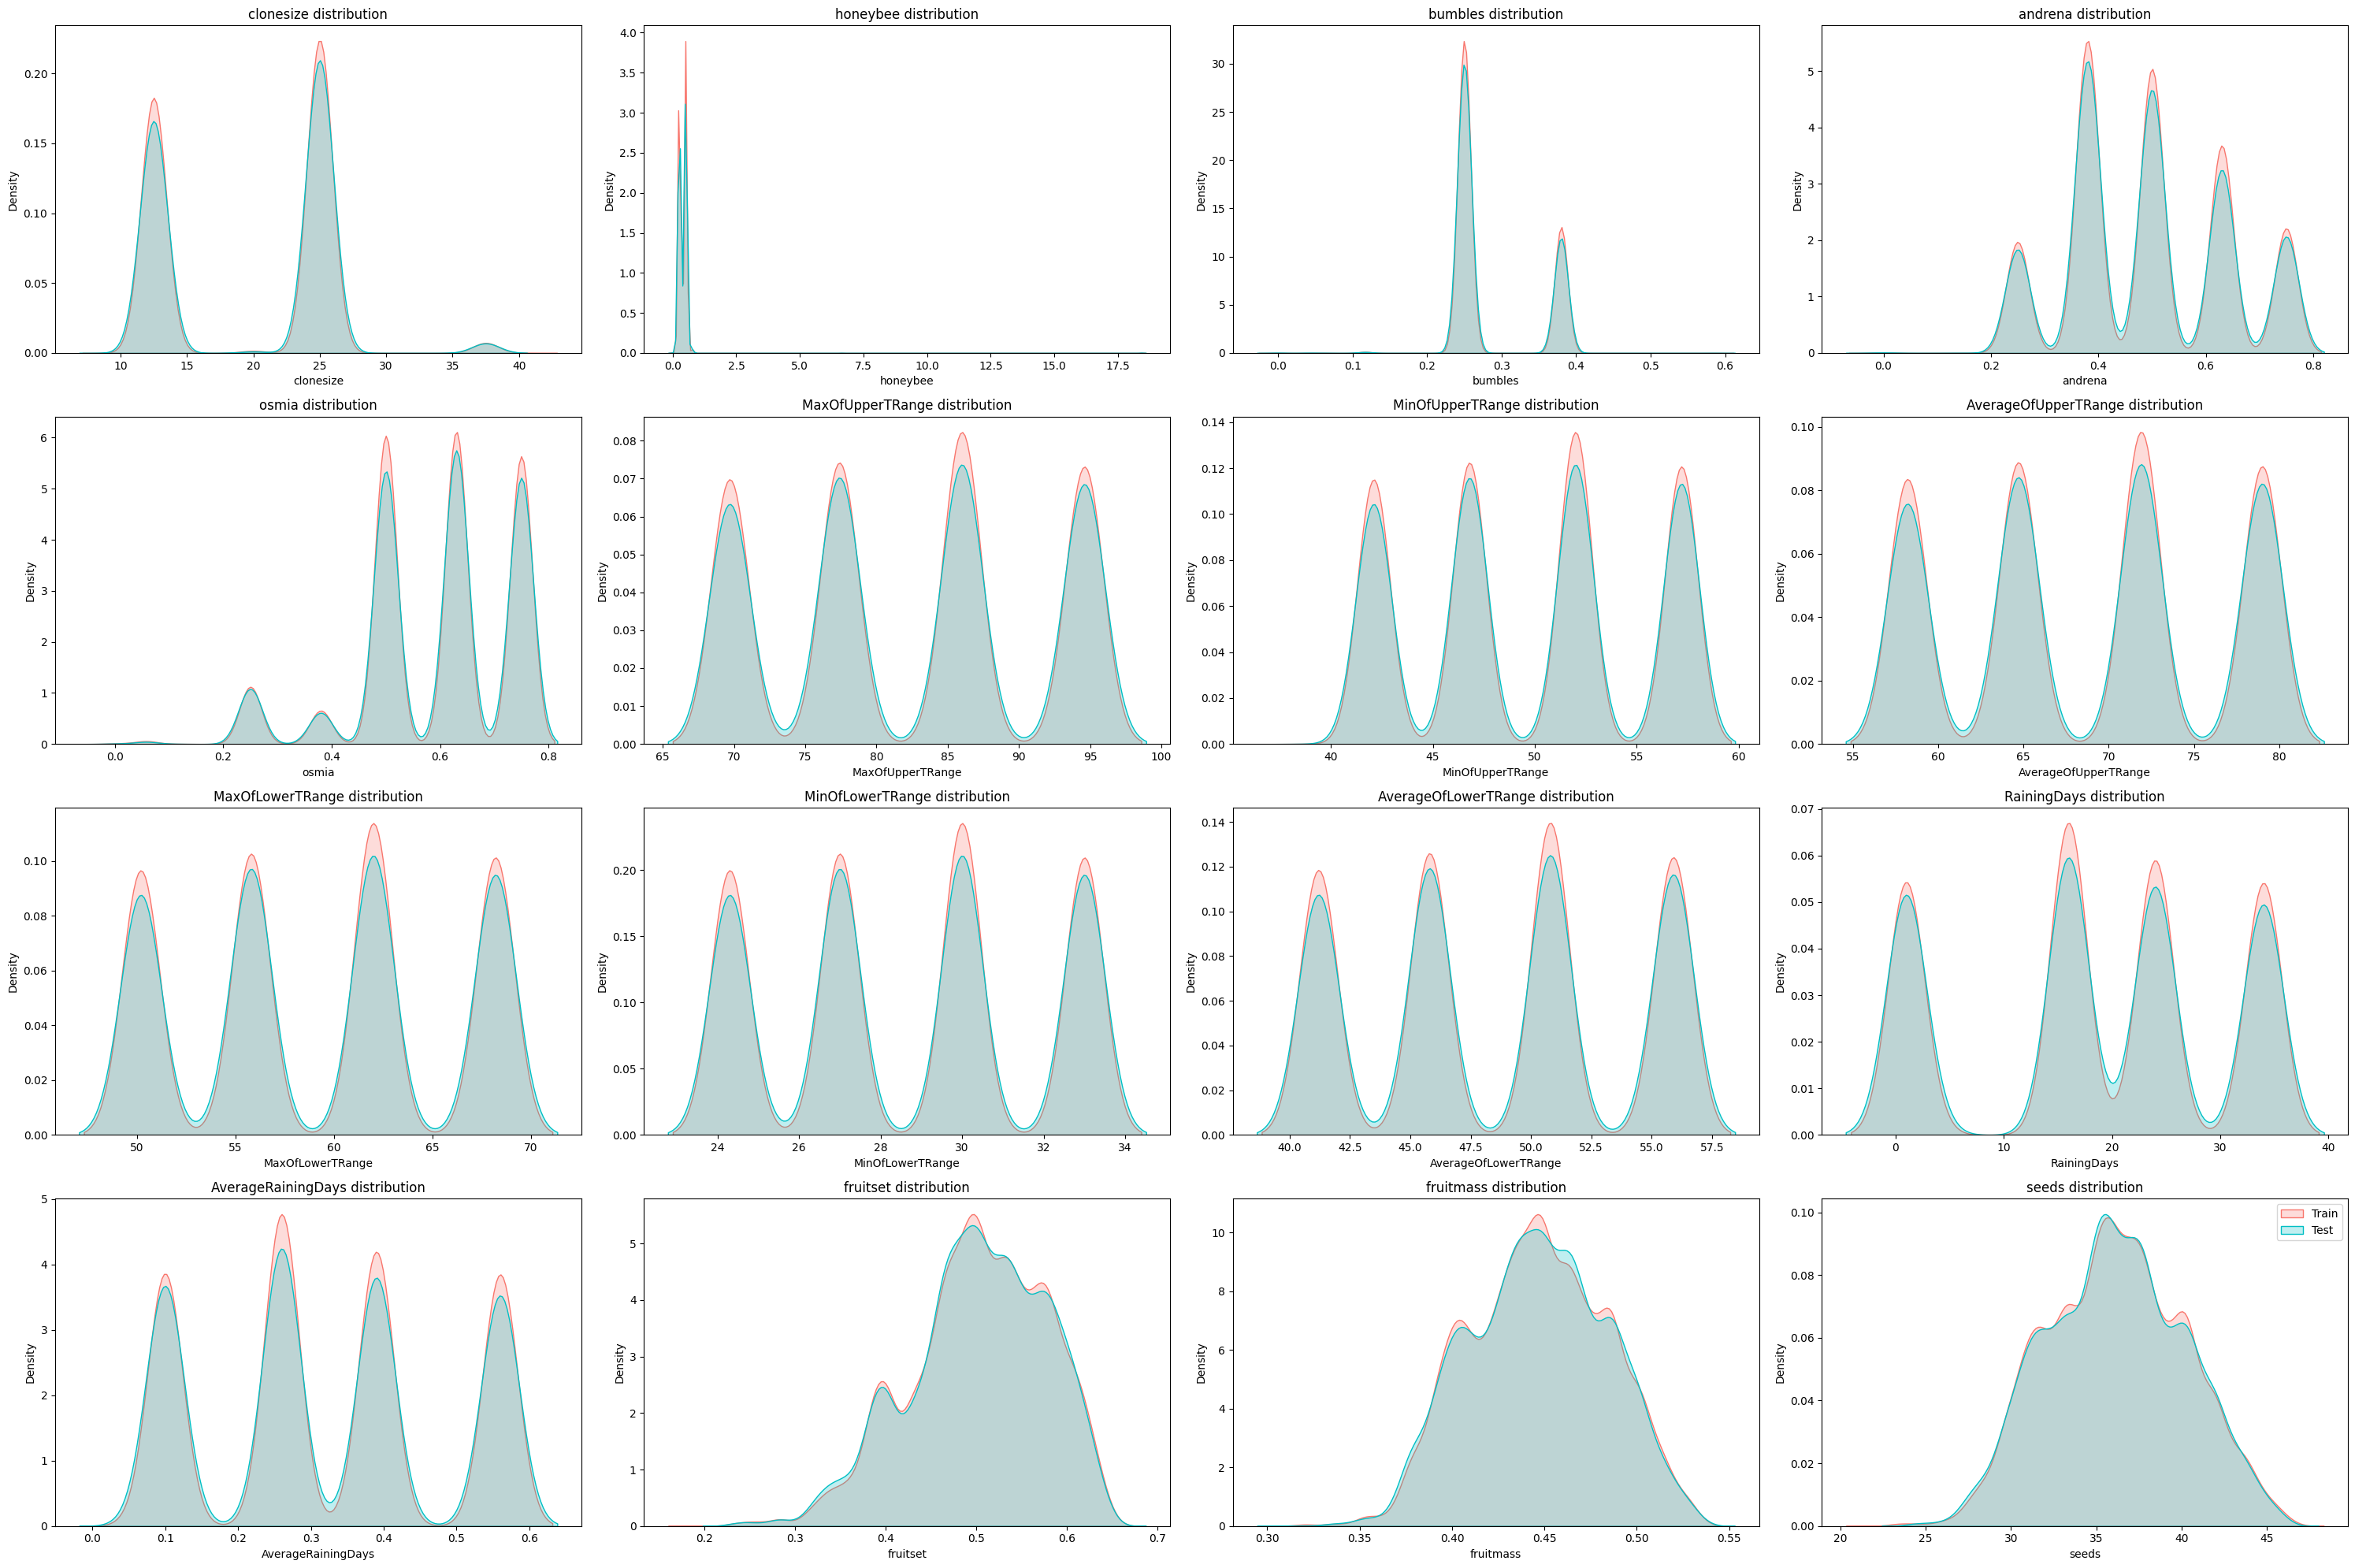

In [15]:
cont_col = [i for (i, j) in zip(test_set.columns, test_set.dtypes) if j in ["int", "float"]]
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, ax in enumerate(axes.flat):
    sns.kdeplot(ax=ax, data=train_set, x=cont_col[i], color="#F8766D", label="Train", fill=True)
    sns.kdeplot(ax=ax, data=test_set, x=cont_col[i], color="#00BFC4", label="Test", fill=True)
    ax.set_title(f"{cont_col[i]} distribution")
fig.tight_layout()
plt.legend()

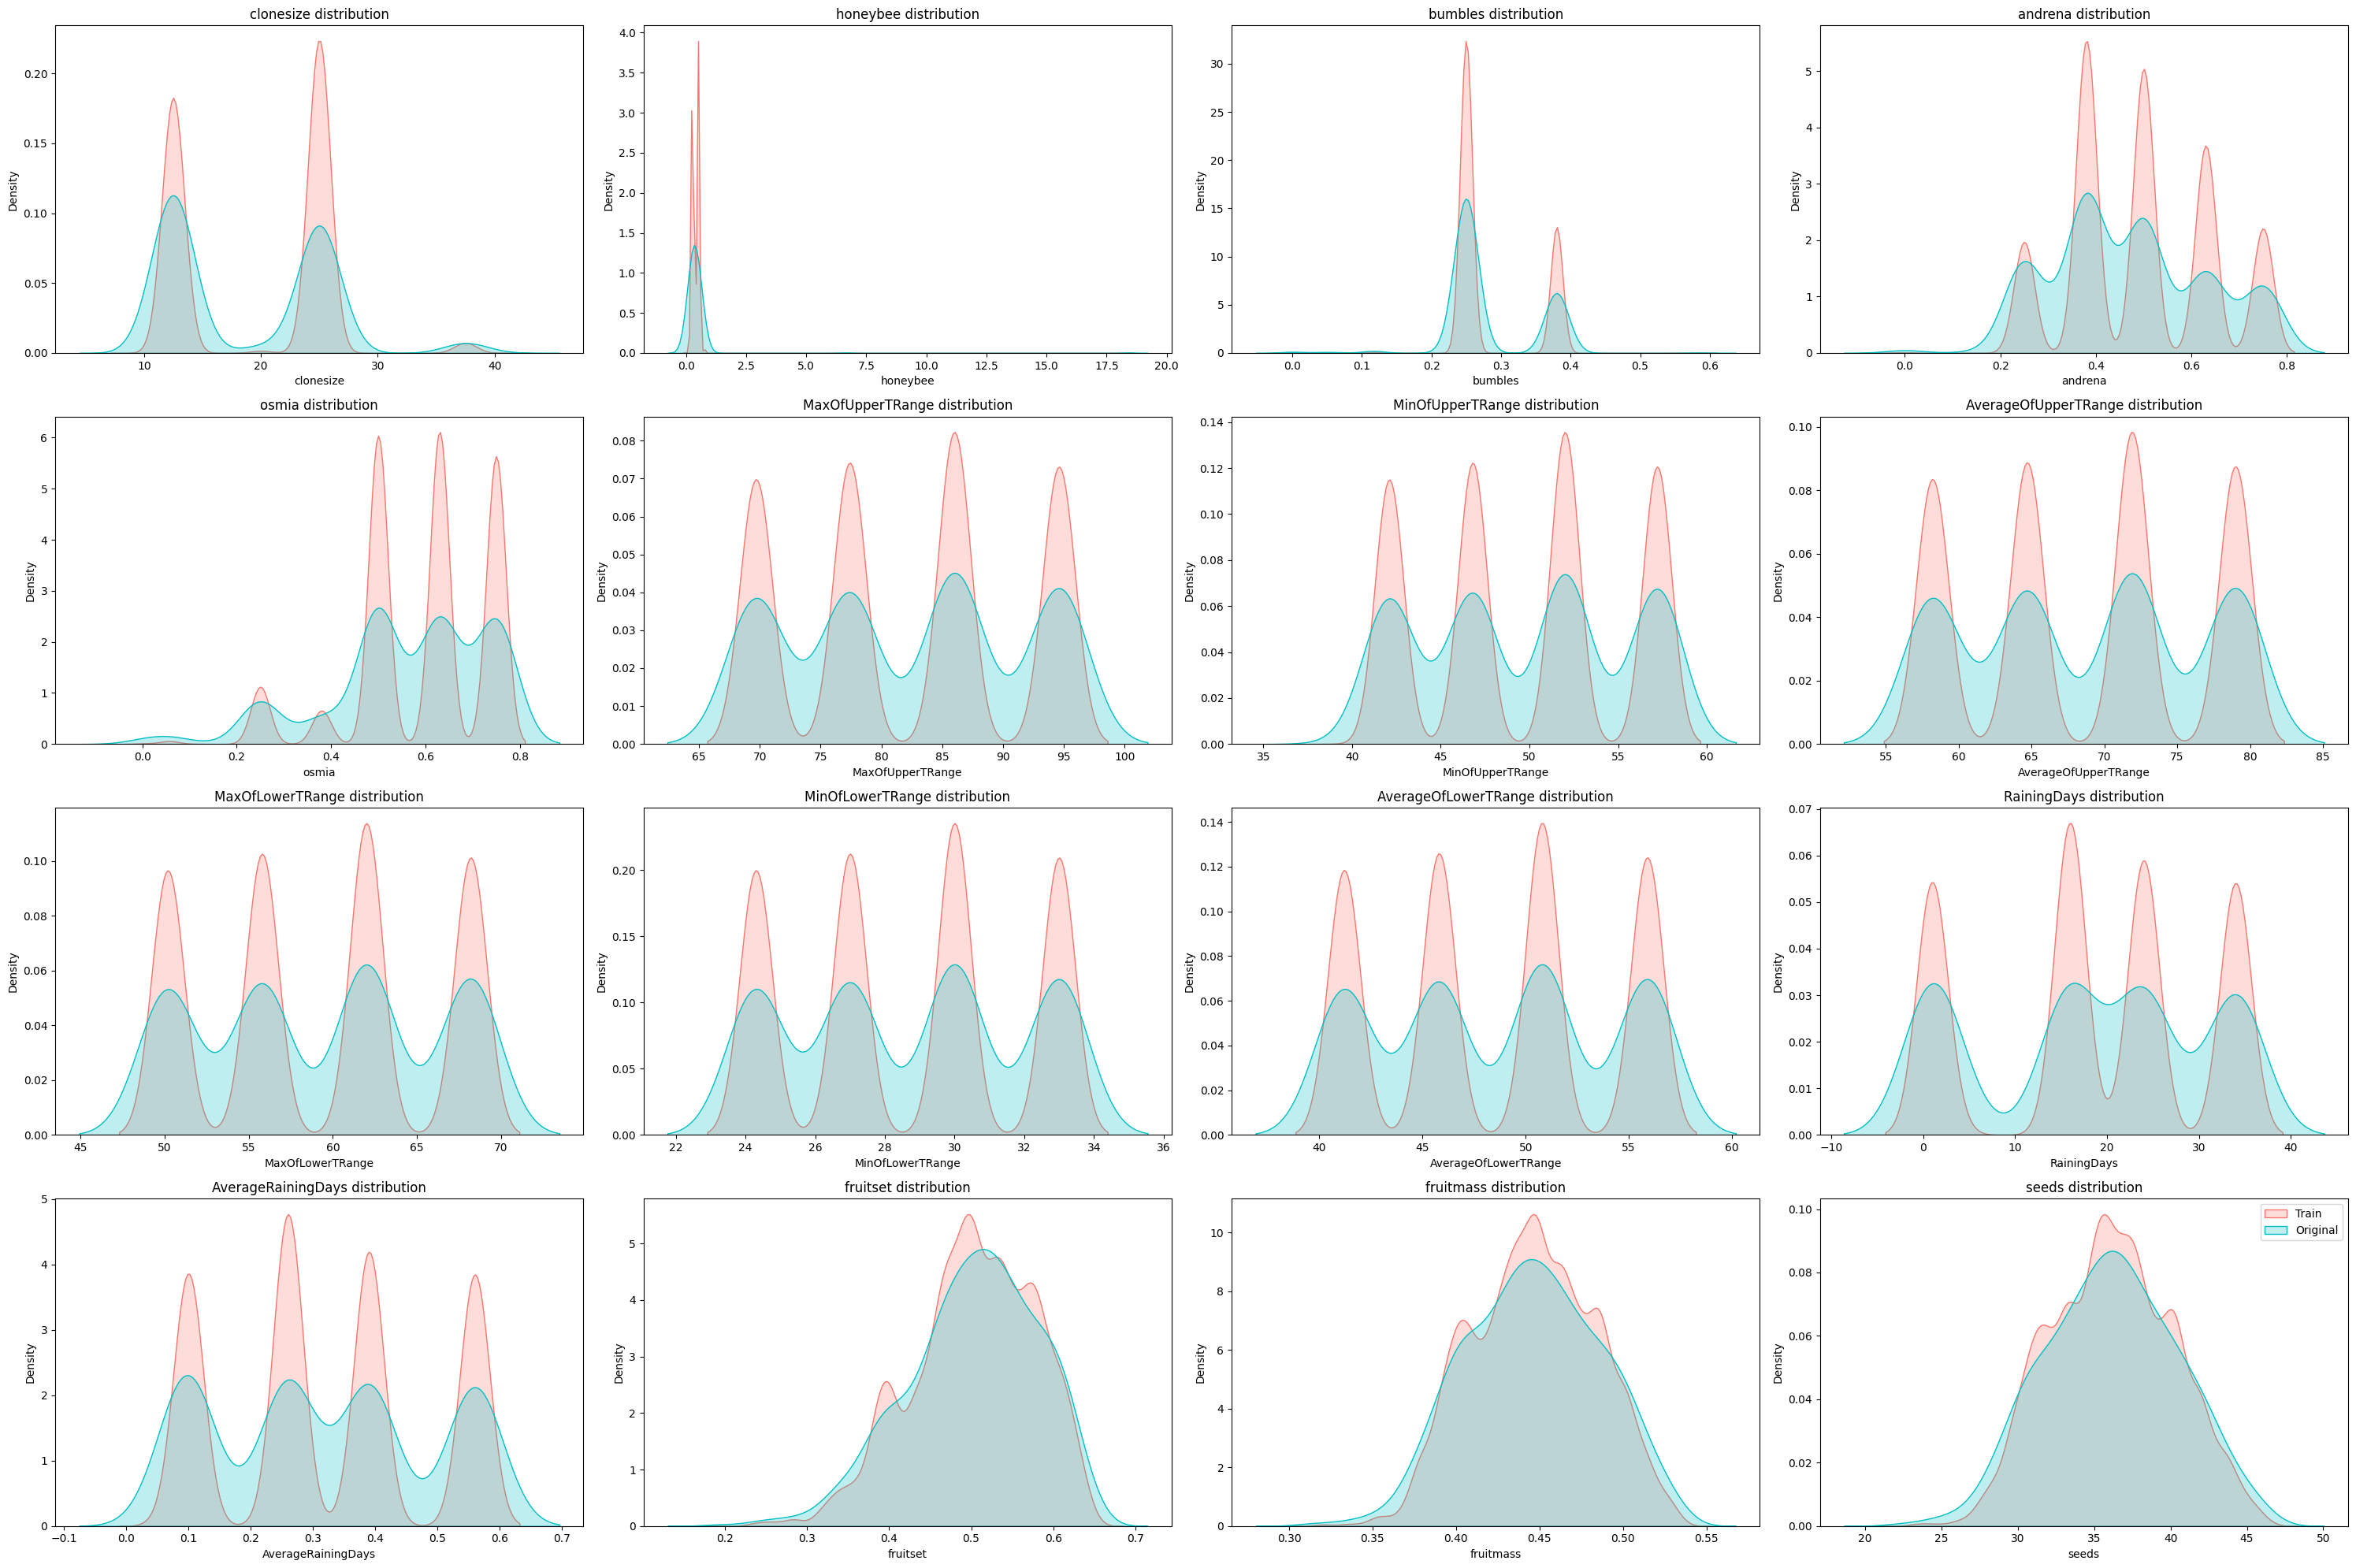

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, ax in enumerate(axes.flat):
    sns.kdeplot(ax=ax, data=train_set, x=cont_col[i], color="#F8766D", label="Train", fill=True)
    sns.kdeplot(ax=ax, data=original_set, x=cont_col[i], color="#00BFC4", label="Original", fill=True)
    ax.set_title(f"{cont_col[i]} distribution")
fig.tight_layout()
plt.legend()

From the above two density plots it can be said that the train and test sets have similar distribution. 
Hoewver, the train and original dataset is not similarly distributed. This could be because of the original data have less instances. 

Moreover, only fruitmass, seeds and fruitset shows normal distribution. Other variables show uneven distributions which may impact the performance of the model.


<Axes: xlabel='yield', ylabel='Density'>

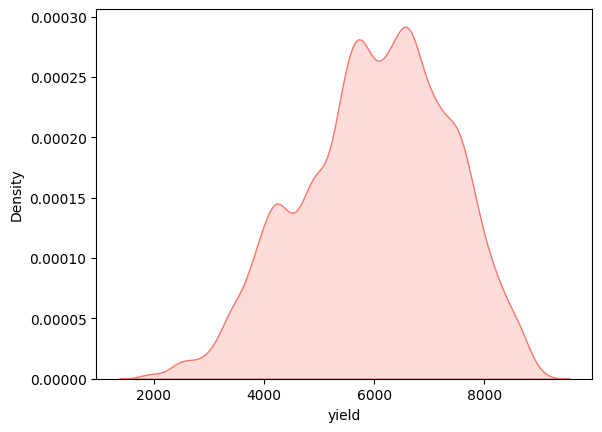

In [17]:
# Plotting the dependent variable

sns.kdeplot( train_set['yield'], color="#F8766D", fill=True)

The yield is also showing almost normal distribution

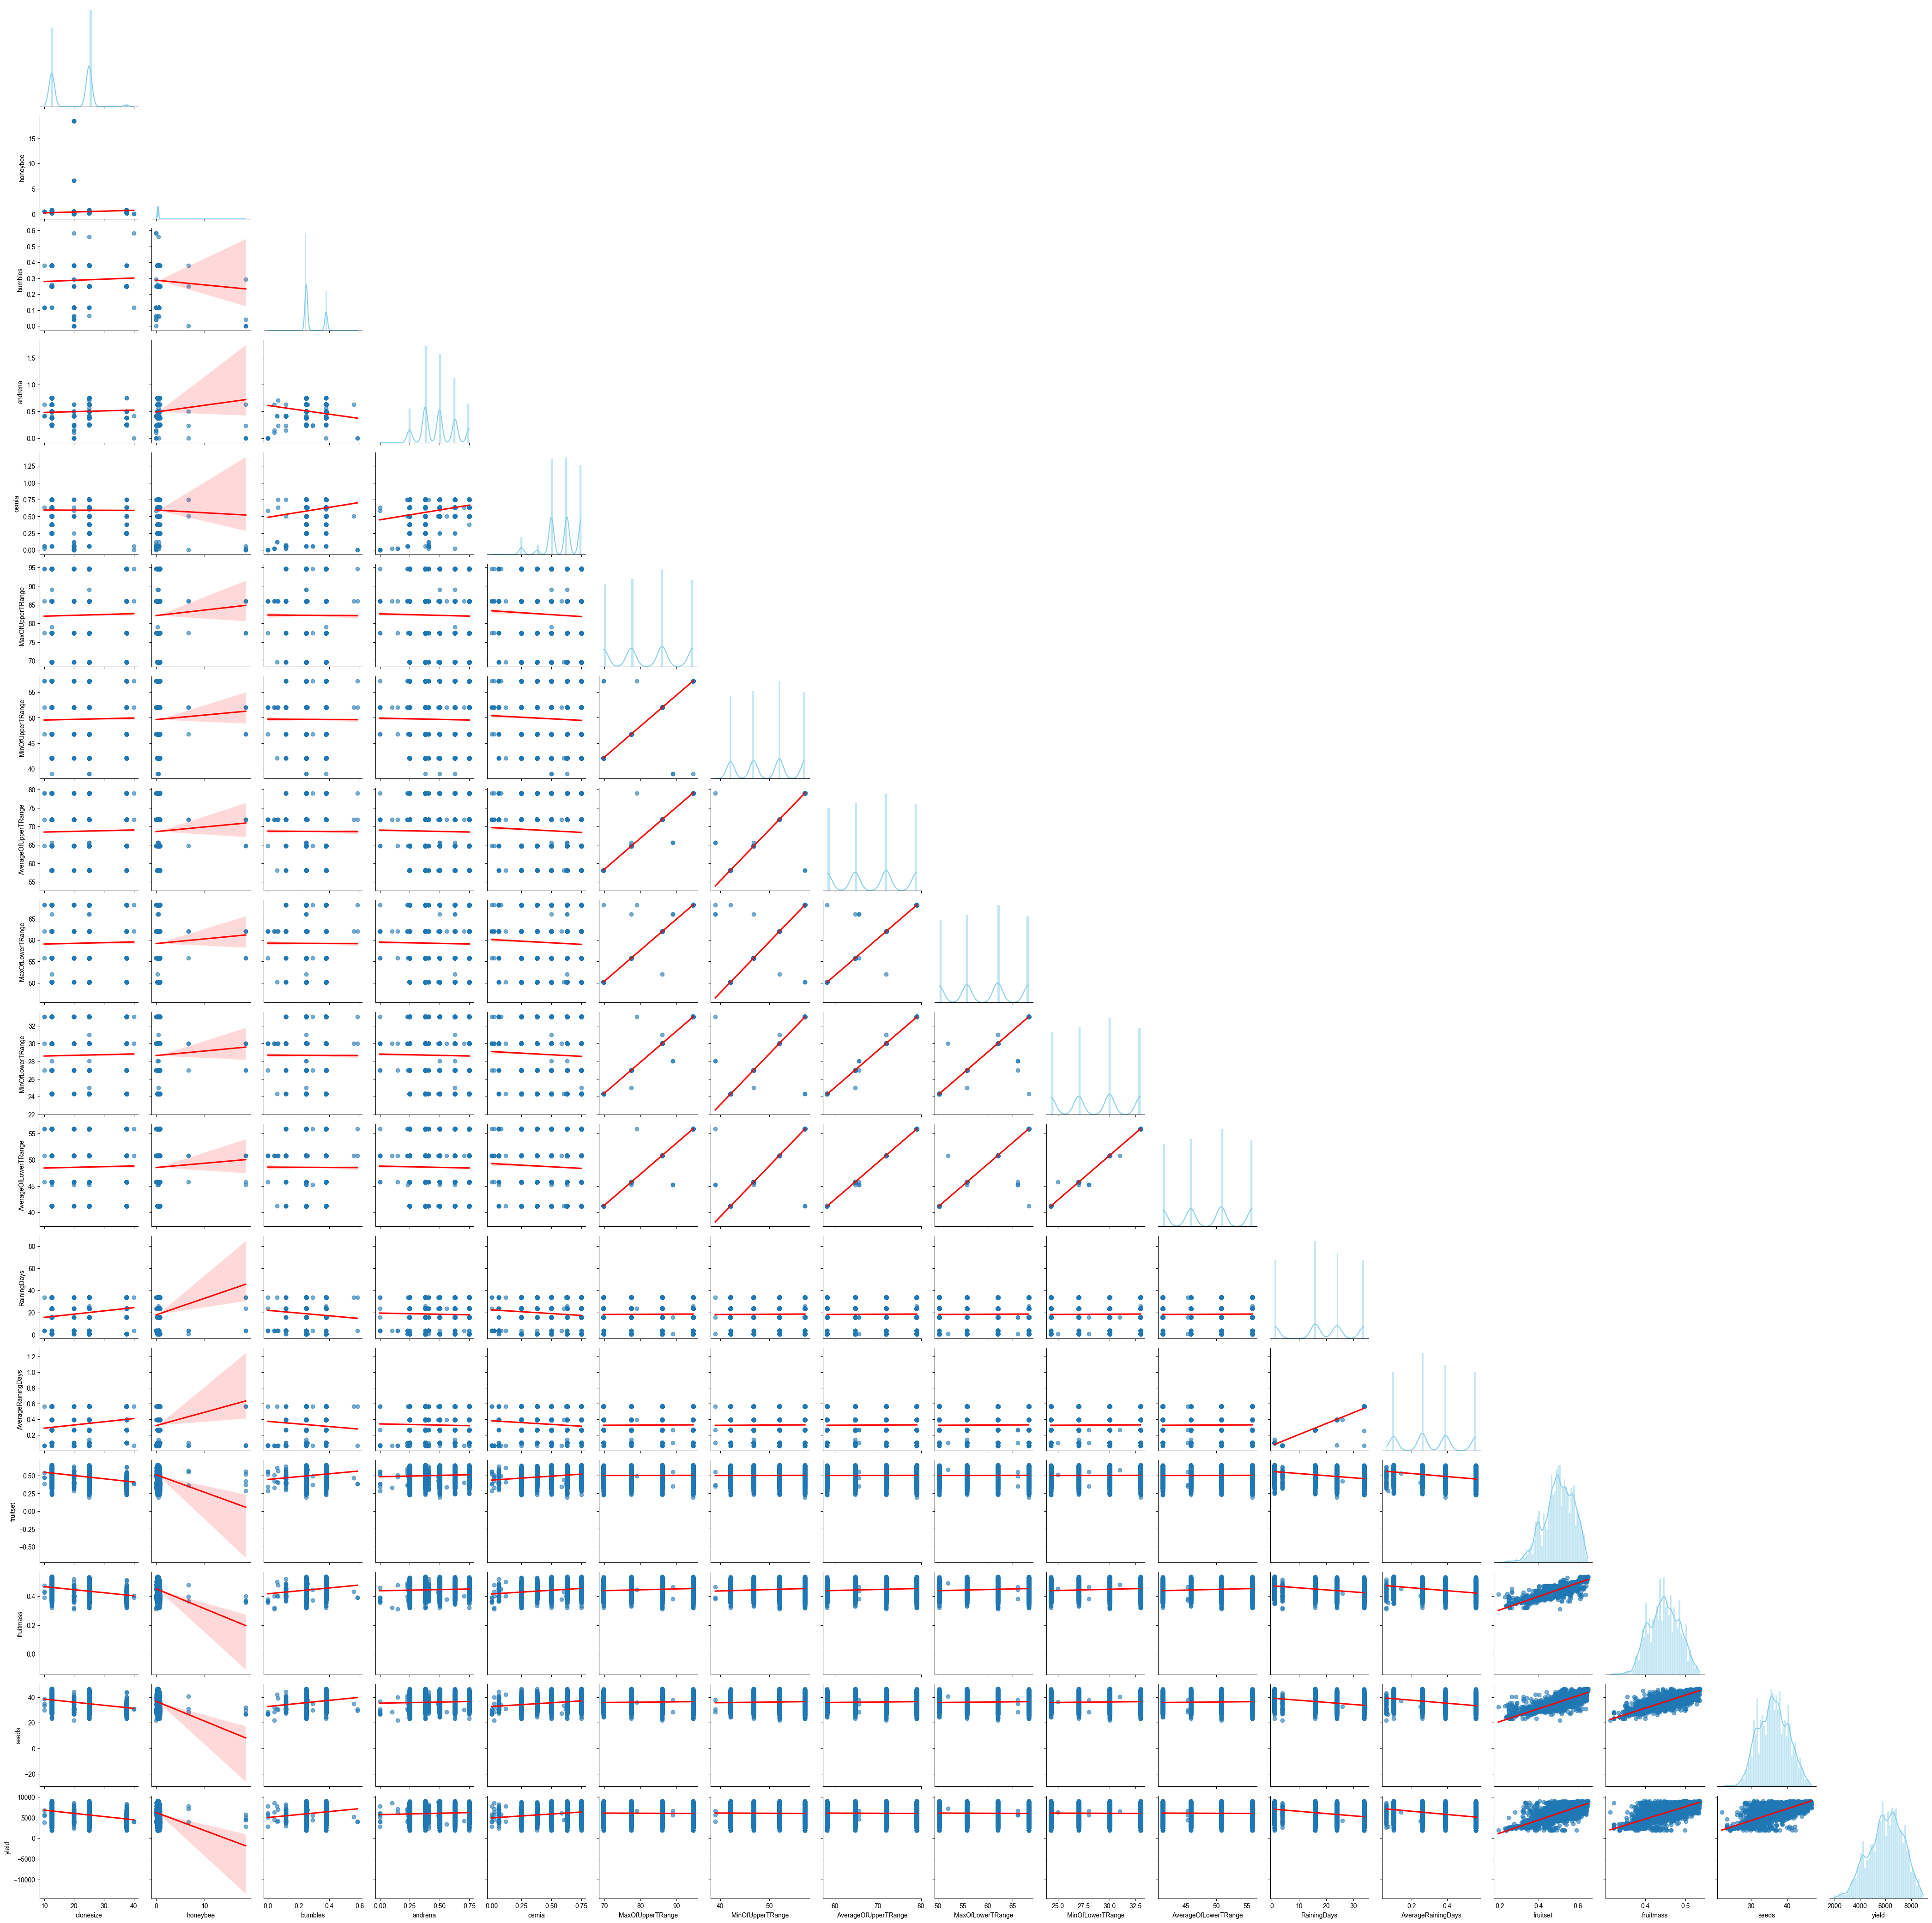

In [18]:
# List of feature names
features = ["clonesize", "honeybee", "bumbles", "andrena", "osmia", "MaxOfUpperTRange", "MinOfUpperTRange", 
            "AverageOfUpperTRange", "MaxOfLowerTRange", "MinOfLowerTRange", "AverageOfLowerTRange", "RainingDays", 
            "AverageRainingDays", "fruitset", "fruitmass", "seeds"]

# Target variable
target = "yield"

# Add target to the list of features
features_with_target = features + [target]

# Create the PairGrid with the dataset and the features including the target
g = sns.PairGrid(data=train_set, vars=features_with_target, diag_sharey=False, corner=True)

# Create the scatter plots with trend lines on the lower triangle
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.6, 'edgecolor': None}, line_kws={'color': 'red'})

# Set the overall aesthetics for the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Customize the diagonal plots as histograms
g.map_diag(sns.histplot, kde=True, color="skyblue")

# Show the grid
plt.show()

From the above scatter plots, it can be seen that some of the variables like Seeds, Friutmass, Fruitset, Osmia and Bumbles show posiive correlation with the targert variable. But need to reduce the features by feature engineering 

### Feature Engineering

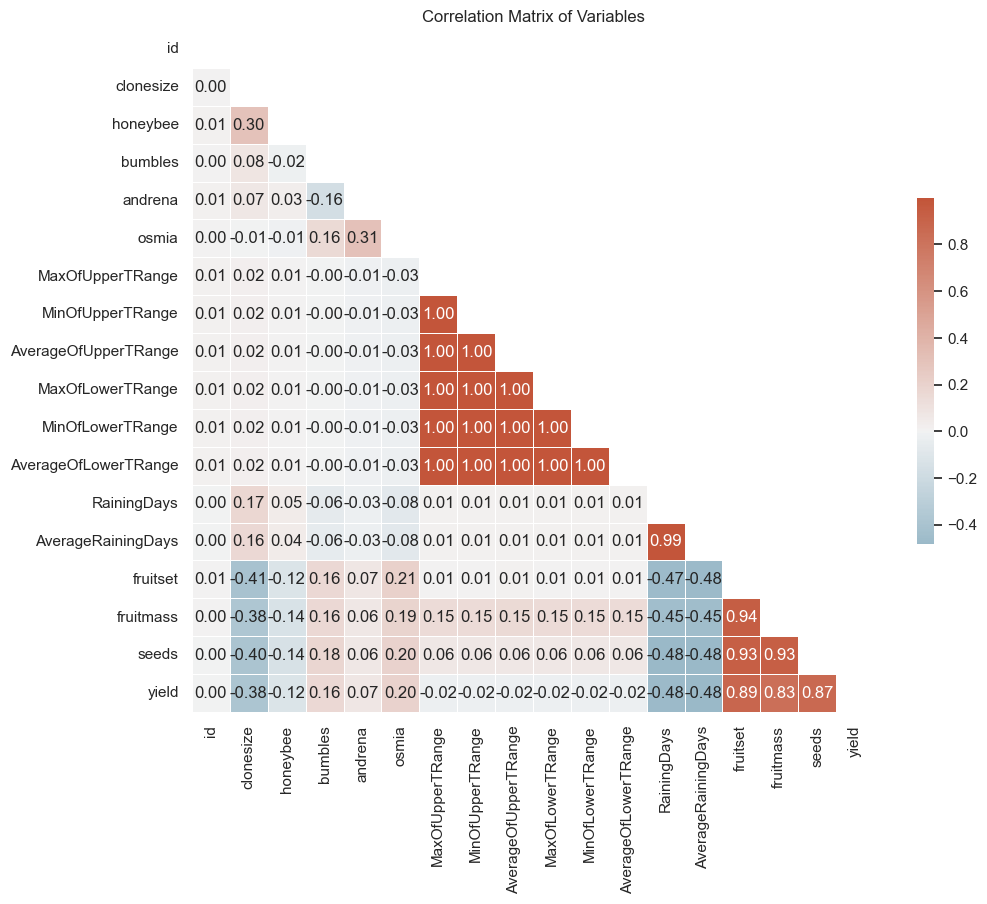

In [19]:
# Compute the correlation matrix
corr_matrix = train_set.corr()

# Set the overall aesthetics for the plot
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title for the correlation matrix
plt.title("Correlation Matrix of Variables")

# Show the plot
plt.show()

In [20]:
# Set the correlation threshold
threshold = 0.8

# Create a list to store the variables to remove
variables_to_remove = []

# Iterate through the correlation matrix, ignoring the target variable's row and column
for i in range(len(corr_matrix.columns)):
    if corr_matrix.columns[i] == "yield":
        continue

    for j in range(i):
        if corr_matrix.columns[j] == "yield":
            continue

        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            variables_to_remove.append(colname)

# Remove duplicate variables from the list
variables_to_remove = list(set(variables_to_remove))

# Print the variables to remove
print("Variables to remove:", variables_to_remove)

Variables to remove: ['fruitmass', 'seeds', 'AverageOfLowerTRange', 'MinOfLowerTRange', 'AverageRainingDays', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'AverageOfUpperTRange']


From the above correlation matrix, it can be said the features like 'MinOfLowerTRange', 'MinOfUpperTRange', 'AverageOfLowerTRange', 'seeds', 'AverageOfUpperTRange', 'fruitmass', 'AverageRainingDays', 'MaxOfLowerTRange' are highly correlated with other independent variables so therefore we need to remove them further. 


In [21]:
# Drop the variables from the dataset
train_set = train_set.drop(columns=variables_to_remove)
test_set = test_set.drop(columns=variables_to_remove)

In [22]:
train_set.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,7479.93417


In [23]:
test_set.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.399367
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,1.0,0.488048
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,16.0,0.583379
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,16.0,0.433014
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,24.0,0.360996


### Checking Outliers

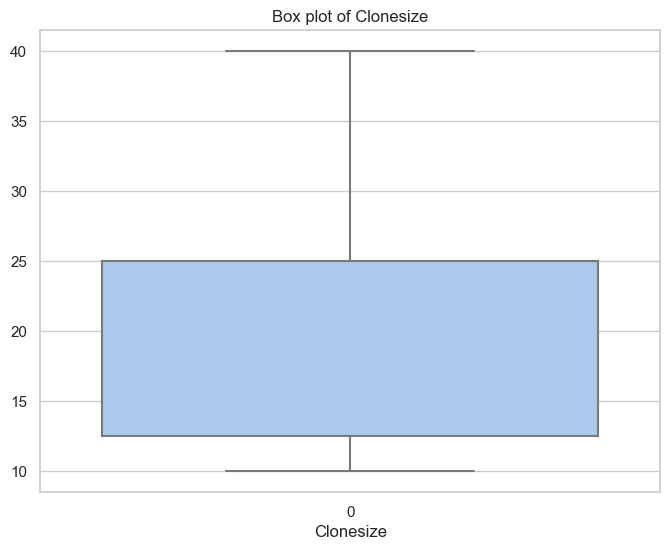

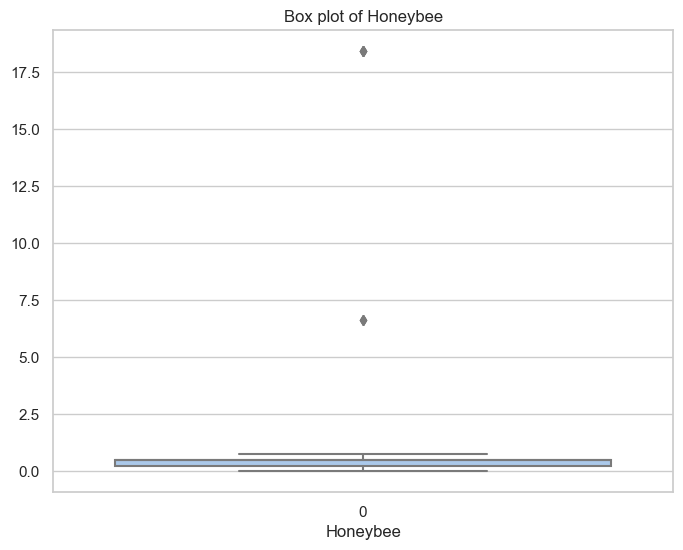

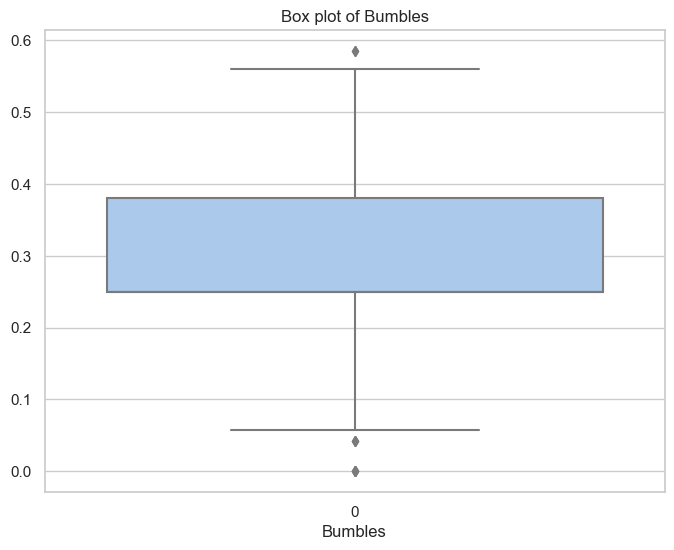

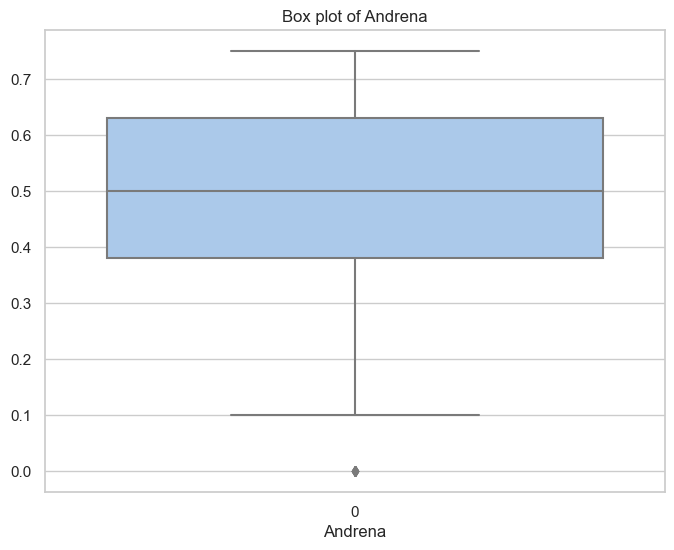

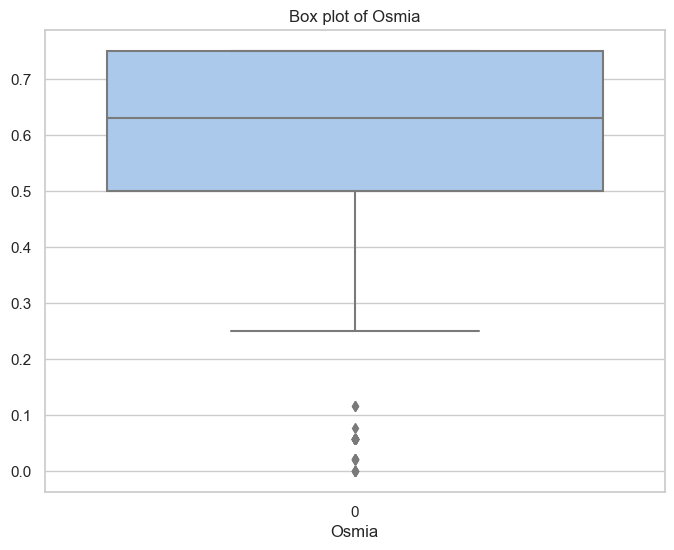

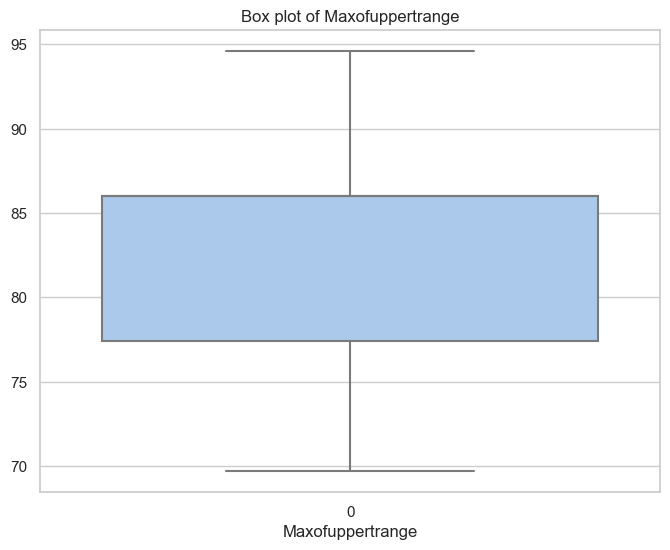

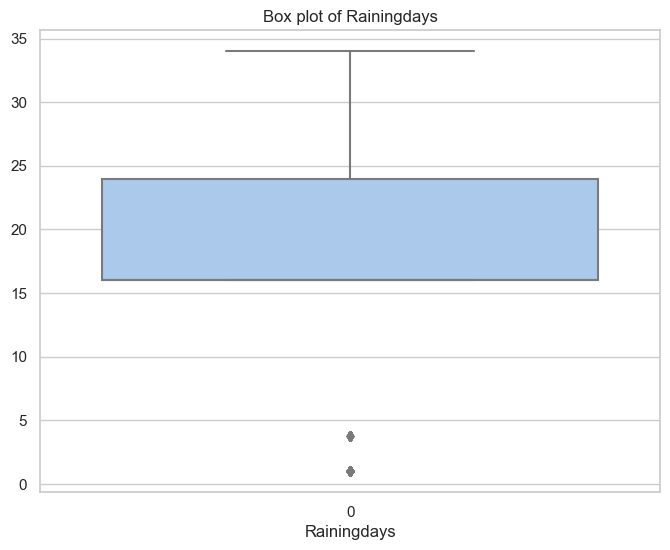

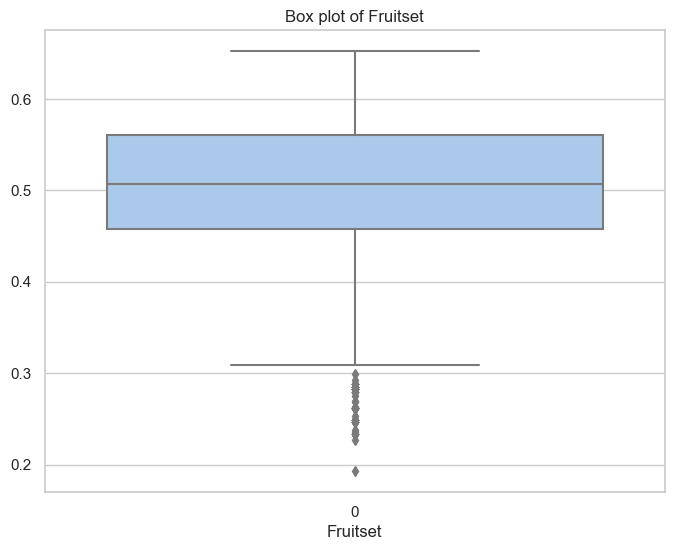

In [38]:
# New features list
new_features = ["clonesize", "honeybee", "bumbles", "andrena", "osmia", "MaxOfUpperTRange", "RainingDays", 
            "fruitset"] 
# Set the overall aesthetics for the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Loop through the features and create box plots
for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set[feature])
    plt.title(f"Box plot of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.show()


From above box-plots, we can see that most of the features does not contain any outlier, though their are some features which have some outliers but it would have insignificant impact on the box-plot

### K-means clustering

In [27]:
# Remove the target variable as it's not relevant for clustering
data_no_target = train_set.drop(columns=["yield"])

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_target)


d:\End-to-End ML Projects\MLProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\End-to-End ML Projects\MLProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\End-to-End ML Projects\MLProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\End-to-End ML Projects\MLProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

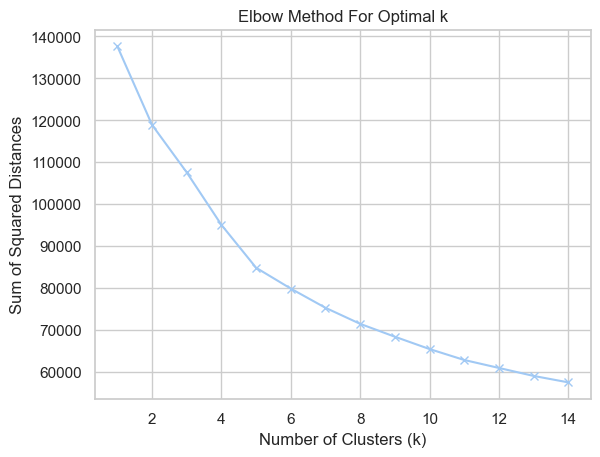

In [28]:
# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the plotting we can say the it can have 5 clusters in the dataset

In [29]:
# Set the optimal number of clusters
optimal_k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_


d:\End-to-End ML Projects\MLProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Principle Component Analysis

In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)


In [31]:
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
principal_df["Cluster"] = cluster_labels

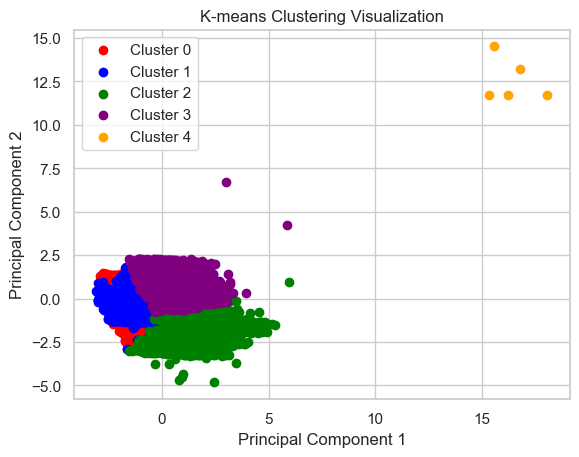

In [32]:
# Set the colors for the clusters
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "yellow", "black", "gray"]

# Plot the clusters
for cluster in range(optimal_k):
    plt.scatter(principal_df.loc[principal_df["Cluster"] == cluster, "PC1"],
                principal_df.loc[principal_df["Cluster"] == cluster, "PC2"],
                c=colors[cluster], label=f"Cluster {cluster}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering Visualization")
plt.legend()
plt.show()


From the above scatter plot, the clusters are not sperated clearly, however to make sure we need to calculate the silhoutte score, calinski score and davies score which will tells us about the quality of the clusters formed. 

### Cluster Quality Evaluation


In [33]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.17131736543608628


The quality of the clusters in your dataset appears to be moderate. The silhouette score is positive, which is good, but it's relatively low, suggesting that the clusters may not be very well separated. A higher silhouette score (closer to 1) would indicate better-defined clusters

In [34]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(data_scaled, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)


Calinski-Harabasz Index: 2379.2068660038935


The Calinski-Harabasz index is relatively high, which is a positive indication. A higher value suggests better-defined clusters. 

In [35]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)


Davies-Bouldin Index: 1.4748410733555144


The Davies-Bouldin index is around 1.47, which is not particularly low. Lower values (closer to 0) are better, indicating well-separated clusters. This value suggests that the clusters may not be very well separated.

The evaluation metrics suggest that the clusters may not be very well separated. Therefore, we cannot lable the data with clusters

In [36]:
#final_train_set = pd.DataFrame(train_set)
#final_test_set = pd.DataFrame(test_set)


In [37]:
#final_train_set.to_csv("D:\\End-to-End ML Projects\\MLProject\\artifacts\\final_train_set.csv")
#final_test_set.to_csv("D:\\End-to-End ML Projects\\MLProject\\artifacts\\final_test_set.csv")

### Conclusion

From the above EDA process, we have removed the features which are highly correlated with each other. Moreover, there are some features which have outliers but it would have insignificant impact on the model. On top of that, we performed K-means clustering but didn't got good quality clusters therefore we can conclude that we don't have similar and distinct groups in the dataset.